# Performance assessment of library-specific reduced templates 

## Import datasets

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

df1 = pd.read_csv('../results/library-specific_RTs/MinTEs_selection.tsv', sep='\t')
df2 = pd.read_csv('../results/library-specific_RTs/RTs_BAGEL_rnd.tsv', sep='\t')
df3 = pd.read_csv('../results/library-specific_RTs/RTs_BAGEL_dd.tsv', sep='\t')

## Plots

Performances of MinTEs reduced templates using BAGEL:

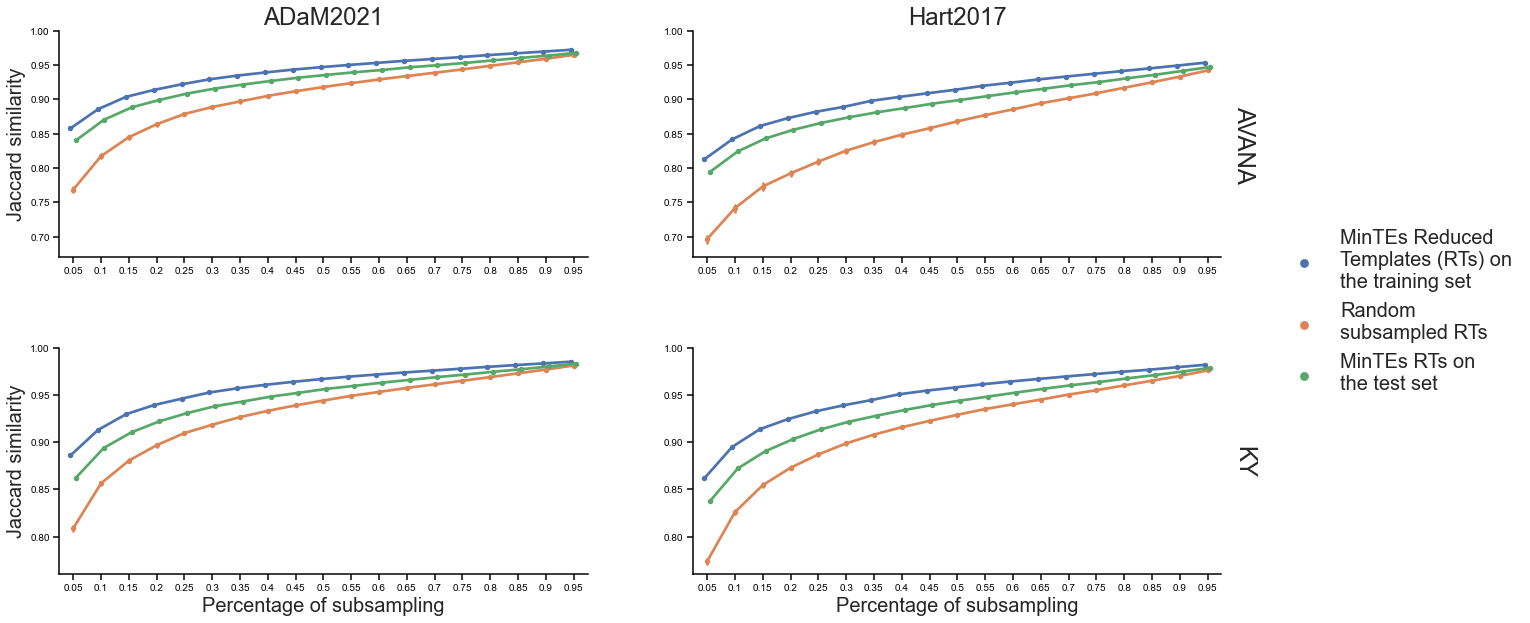

In [6]:
idx = np.unique(np.array(df1['perc']))
idx = idx.tolist()

sns.set_style("whitegrid", {'font.family':'sans-serif', 'font.sans-serif':'Arial', 'axes.grid':False, 
    'axes.edgecolor':'black'})
g = sns.FacetGrid(data = df1, row = 'source', col = 'gset', gridspec_kws={"wspace":0.2, "hspace":0.4},
    height = 5, aspect = 2, margin_titles=True, sharey=False)
g.map(sns.pointplot, 'perc', 'value', 'type', order = idx,\
    hue_order = ['MinTEs Reduced\nTemplates (RTs) on\nthe training set', 'Random\nsubsampled RTs', 'MinTEs RTs on\nthe test set'], palette = 'deep',\
    seed = 1234, markers=['.','.','.'], dodge=0.2)
g.add_legend(fontsize=20, markerscale=2)
g.axes[0,0].set_ylabel('Jaccard similarity',size=20)
g.axes[0,0].set_ylim(0.67,1)
g.axes[0,1].set_ylim(0.67,1)
g.axes[1,0].set_ylim(0.76,1)
g.axes[1,0].set_ylabel('Jaccard similarity',size=20)
g.axes[1,0].set_xlabel('Percentage of subsampling',size=20)
g.axes[1,1].set_ylim(0.76,1)
g.axes[1,1].set_xlabel('Percentage of subsampling',size=20)
g.set_titles(col_template="{col_name}", row_template="{row_name}",size=24)

for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize=24)
    ax.tick_params(axis='both', colors='black', reset=True, direction='out', top=False, right=False, length=6, width=1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

 Performances of MinTEs library-specific vs DepMap-data-driven reduced templates using BAGEL:

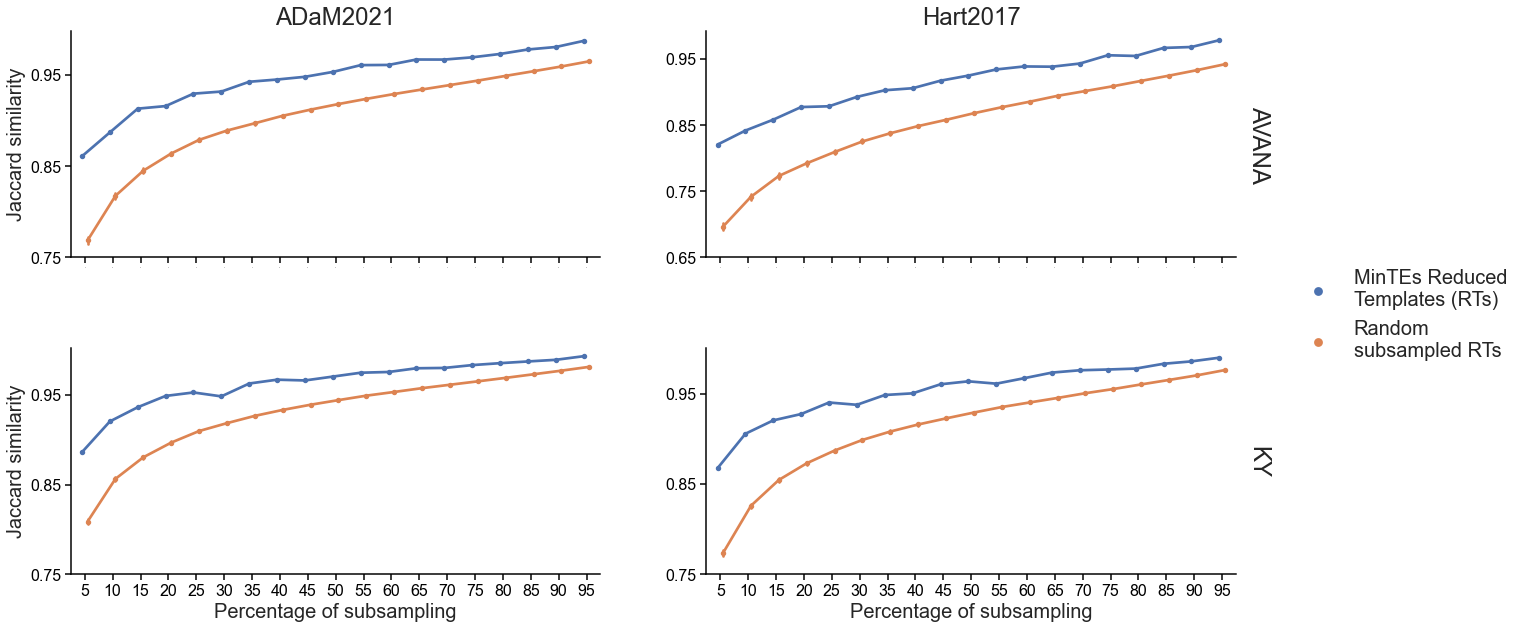

In [7]:
sns.set_style("whitegrid", {'font.family':'sans-serif', 'font.sans-serif':'Arial', 'axes.grid':False, 
        'axes.edgecolor':'black'})
g = sns.FacetGrid(data = df2, row = 'source', col = 'gset', gridspec_kws={"wspace":0.2, "hspace":0.4},
    height = 5, aspect = 2, margin_titles=True, sharey=False, sharex=False)
g = g.map(sns.pointplot, 'perc', 'value', 'type', palette = 'deep',\
    hue_order = ['MinTEs Reduced\nTemplates (RTs)', 'Random\nsubsampled RTs'], seed = 1234, markers=['.','.'], dodge=0.2)
g.add_legend(fontsize=20, markerscale=2)
g.axes[0,0].set_ylabel('Jaccard similarity',size=20)
g.axes[1,0].set_ylabel('Jaccard similarity',size=20)
g.axes[1,0].set_xlabel('Percentage of subsampling',size=20)
g.axes[1,1].set_xlabel('Percentage of subsampling',size=20)

for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize=24)
    ax.tick_params(axis='both', colors='black', reset=True, direction='out', top=False, right=False, length=6, width=1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

for i in range(2):
    for j in range(2):
        y_axis = g.axes[i,j].get_yticks()
        y_init = np.round(np.floor(y_axis[0]/0.05)*0.05, decimals=2)
        y_dist = np.arange(y_init, 1, 0.1)
        y_axis = np.round(y_dist, decimals=2)

        g.axes[i,j].set_yticks(y_axis)
        g.axes[i,j].set_yticklabels(y_axis, size = 16)

        x_axis = (g.axes[i,j].get_xticks()+1)*5

        if i == 1:
            g.axes[i,j].set_xticklabels(x_axis, size = 16)
        else:
            g.axes[i,j].set_xticklabels(x_axis, size = 0)

g.set_titles(col_template="{col_name}", row_template="{row_name}", size=24)

Performances of MinTEs library-specific vs DepMap-data-driven reduced templates using BAGEL:

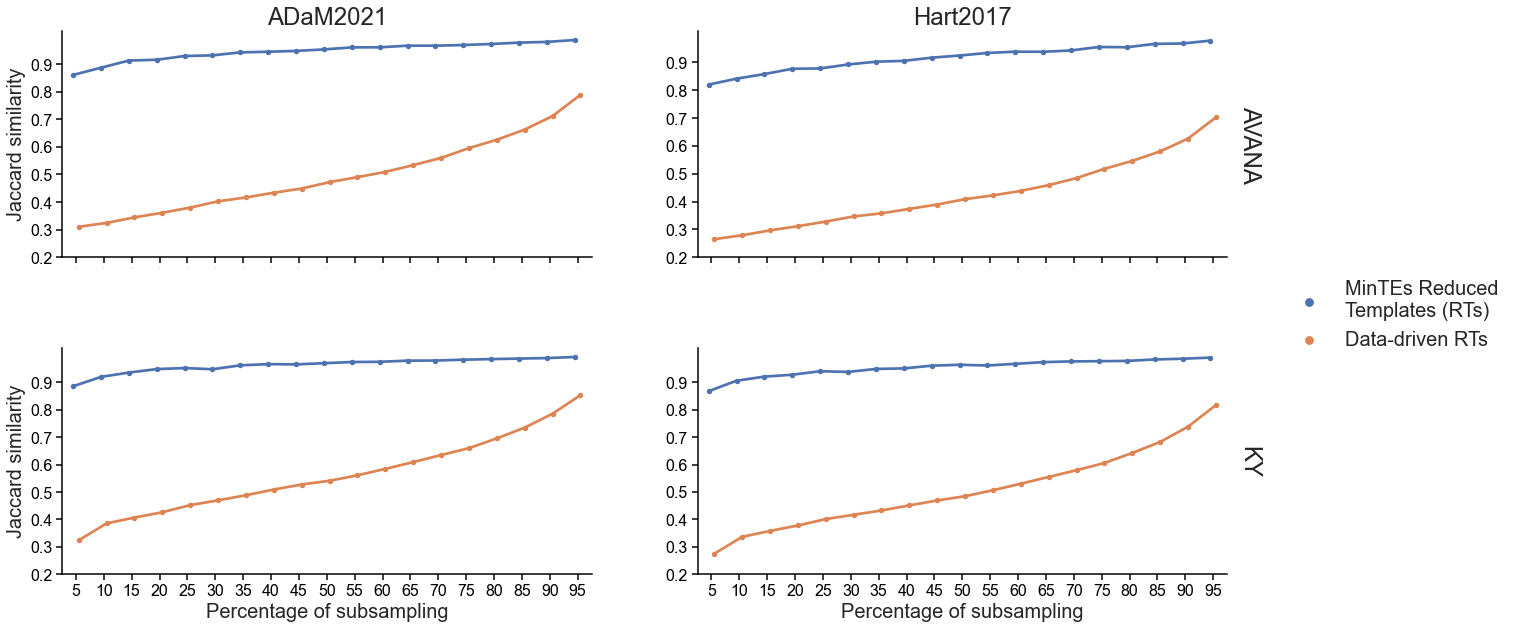

In [8]:
sns.set_style("whitegrid", {'font.family':'sans-serif', 'font.sans-serif':'Arial', 'axes.grid':False, 
        'axes.edgecolor':'black'})
g = sns.FacetGrid(data = df3, row = 'source', col = 'gset', gridspec_kws={"wspace":0.2, "hspace":0.4},
    height = 5, aspect = 2, margin_titles=True, sharey=False, sharex=False)
g = g.map(sns.pointplot, 'perc', 'value', 'type', palette = 'deep',\
    hue_order = ['MinTEs Reduced\nTemplates (RTs)', 'Data-driven RTs'], seed = 1234, markers=['.','.'], dodge=0.2)
g.add_legend(fontsize=20, markerscale=2)
g.axes[0,0].set_ylabel('Jaccard similarity',size=20)
g.axes[1,0].set_ylabel('Jaccard similarity',size=20)
g.axes[1,0].set_xlabel('Percentage of subsampling',size=20)
g.axes[1,1].set_xlabel('Percentage of subsampling',size=20)

for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize=24)
    ax.tick_params(axis='both', colors='black', reset=True, direction='out', top=False, right=False, length=6, width=1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

for i in range(2):
    for j in range(2):
        y_axis = g.axes[i,j].get_yticks()
        y_init = np.round(np.floor(y_axis[0]/0.05)*0.05, decimals=2)
        y_dist = np.arange(y_init, 1, 0.1)
        y_axis = np.round(y_dist, decimals=2)

        g.axes[i,j].set_yticks(y_axis)
        g.axes[i,j].set_yticklabels(y_axis, size = 16)

        x_axis = (g.axes[i,j].get_xticks()+1)*5

        if i == 1:
            g.axes[i,j].set_xticklabels(x_axis, size = 16)
        else:
            g.axes[i,j].set_xticklabels(x_axis, size = 0)

g.set_titles(col_template="{col_name}", row_template="{row_name}", size=24)